In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
df = pd.read_csv("all_data.csv")
print(df.head(20))
print(len(df))

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

Okay, I see a few interesting things we can do.  First is see about the correlation between life expectency and GDP in general.  Then looking at trends by year in each region.  And compare the different regions.  We'll need to know what countries are in here.

<Axes: xlabel='GDP', ylabel='Life expectancy at birth (years)'>

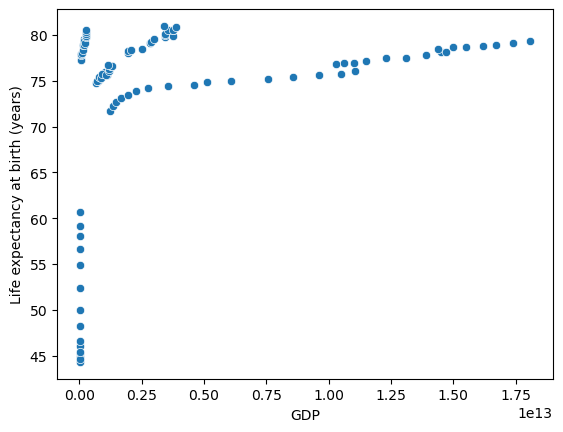

In [2]:
sns.scatterplot(x=df.GDP, y=df["Life expectancy at birth (years)"])

This needs a log scale.  And better axes.

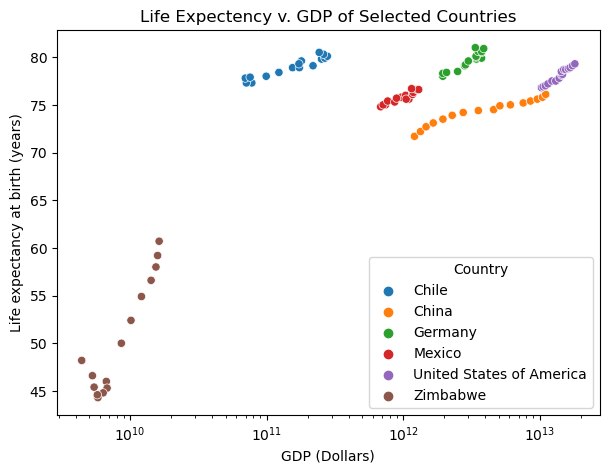

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=[7,5])
sns.scatterplot(data=df, x="GDP", y="Life expectancy at birth (years)", hue="Country")
ax = plt.subplot()
plt.xscale('log')
plt.xlabel("GDP (Dollars)")
plt.title("Life Expectency v. GDP of Selected Countries")
ax.set_xticks([1e10,1e11,1e12,1e13])
plt.savefig('levgdp_all.png')
plt.show()
plt.clf()

Not very useful, as we'd probably want GDP per person, and we don't have population data.  Let's do some line graphs showing behavior with time.

In [9]:
countries = pd.unique(df.Country)


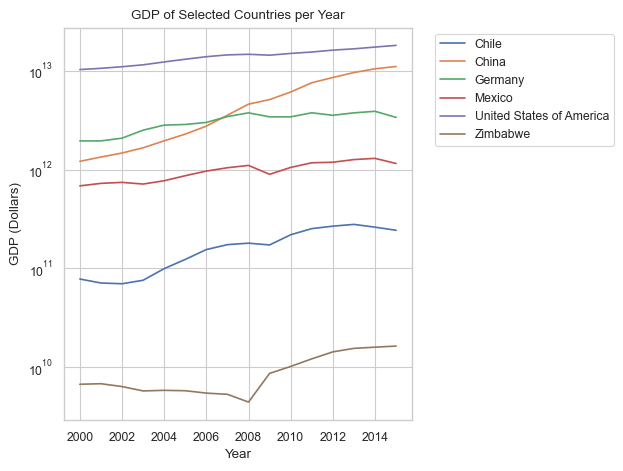

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure()
for country in countries:
    sns.lineplot(data=df[df.Country == country], x="Year", y="GDP", label=country)

plt.yscale('log')
plt.ylabel("GDP (Dollars)")    
plt.title("GDP of Selected Countries per Year")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('gdpvtime_all.png')
plt.show()
plt.clf()

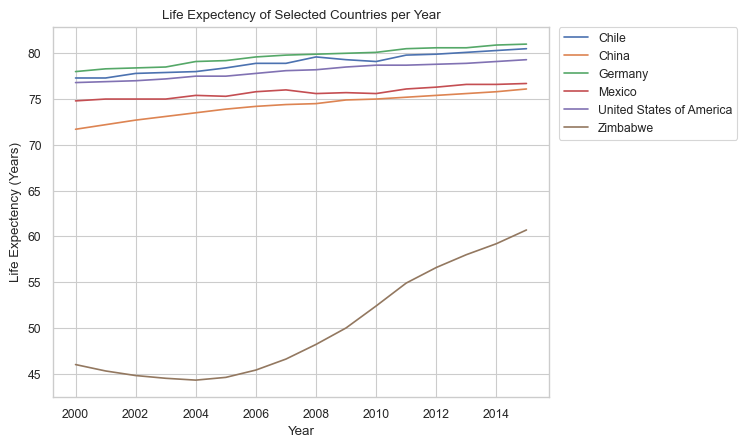

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure()
for country in countries:
    sns.lineplot(data=df[df.Country == country], x="Year", y="Life expectancy at birth (years)", label=country)

plt.ylabel("Life Expectency (Years)")    
plt.title("Life Expectency of Selected Countries per Year")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('levtime_all.png')
plt.show()
plt.clf()

This plot would be a lot more interesting if we seperate out Zimbabwe;

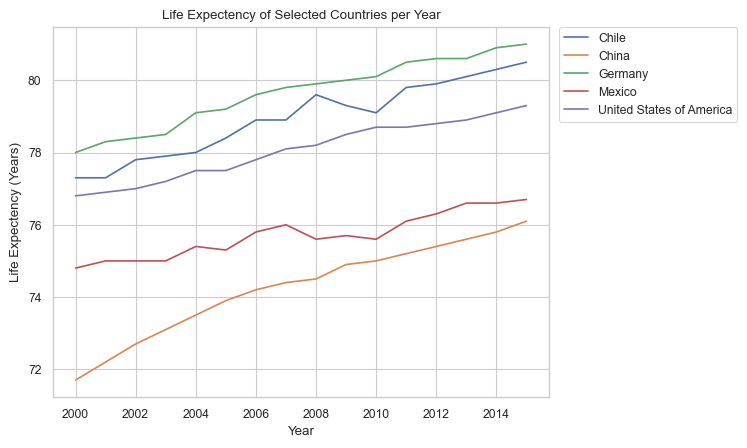

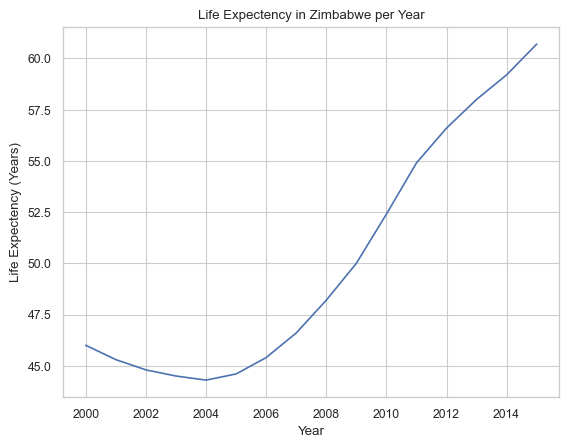

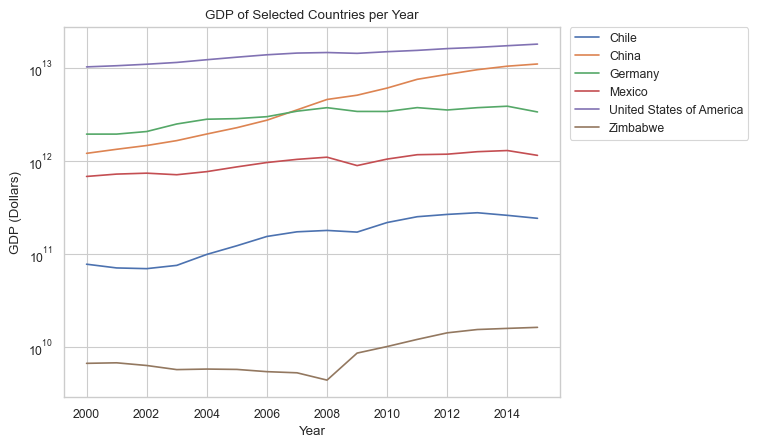

<Figure size 640x480 with 0 Axes>

In [70]:
notAfrica = np.delete(countries,5)

for country in notAfrica:
    sns.lineplot(data=df[df.Country == country], x="Year", y="Life expectancy at birth (years)", label=country)

plt.ylabel("Life Expectency (Years)")    
plt.title("Life Expectency of Selected Countries per Year")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.clf()

sns.lineplot(data=df[df.Country == "Zimbabwe"], x="Year", y="Life expectancy at birth (years)")

plt.ylabel("Life Expectency (Years)")    
plt.title("Life Expectency in Zimbabwe per Year")
plt.show()
plt.clf()

for country in countries:
    sns.lineplot(data=df[df.Country == country], x="Year", y="GDP", label=country)

plt.yscale('log')
plt.ylabel("GDP (Dollars)")    
plt.title("GDP of Selected Countries per Year")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

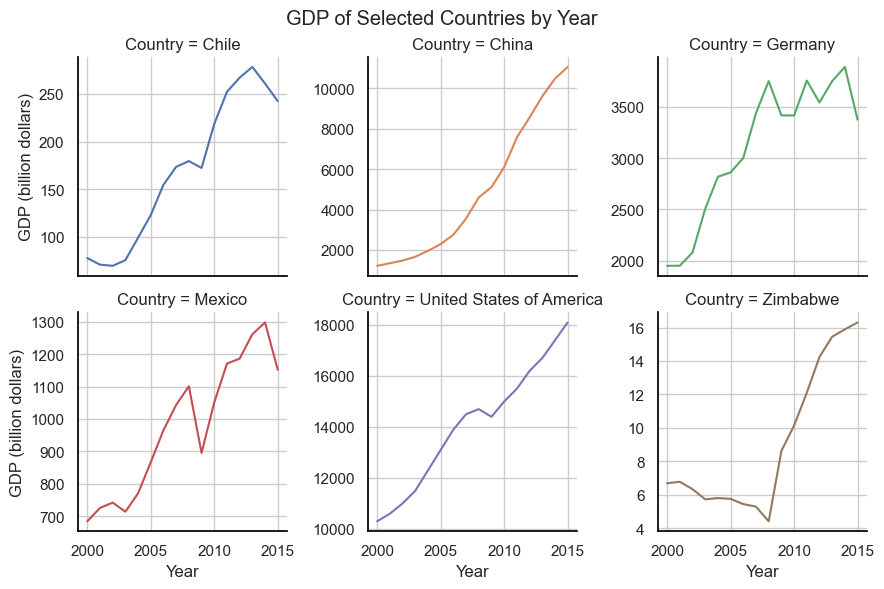

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

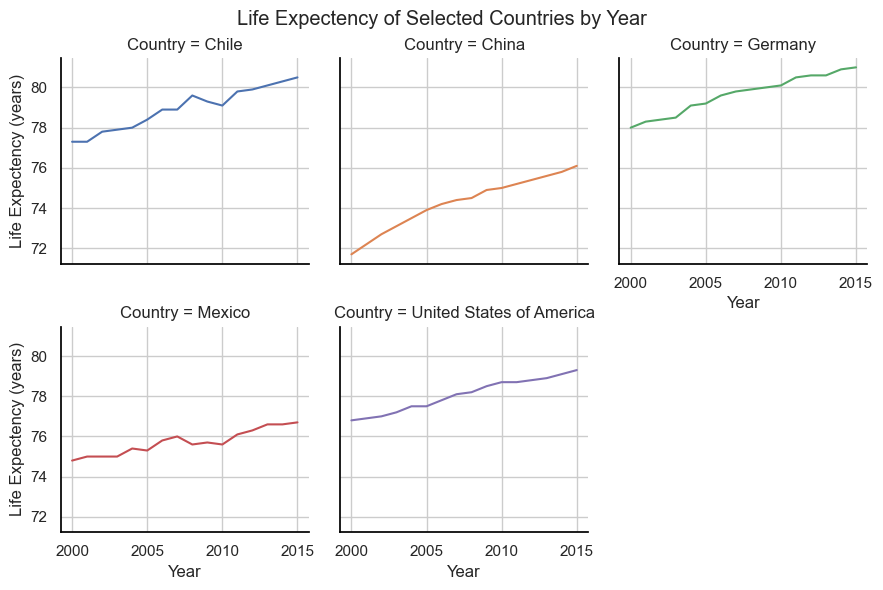

<Figure size 640x480 with 0 Axes>

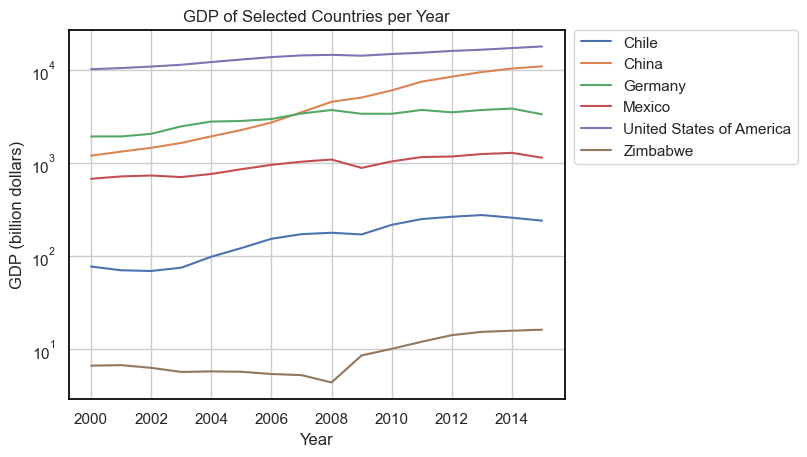

<Figure size 640x480 with 0 Axes>

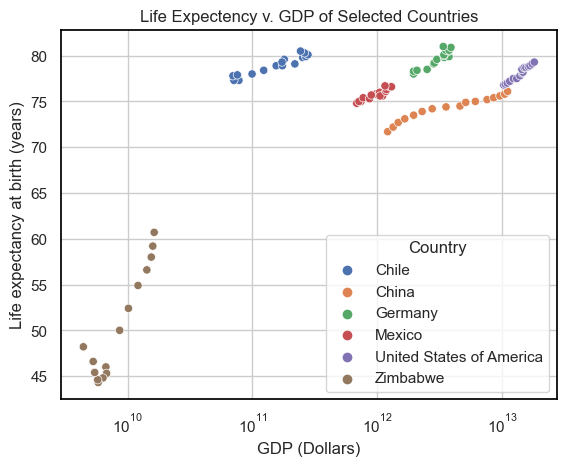

<Figure size 640x480 with 0 Axes>

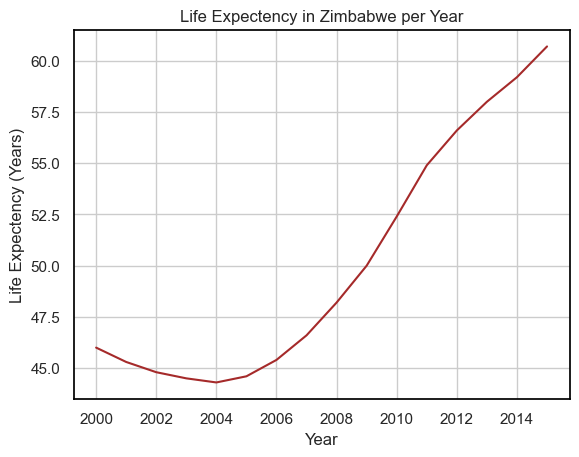

<Figure size 640x480 with 0 Axes>

In [33]:
sns.set()
sns.color_palette()
sns.set_context("notebook")
sns.set_style("whitegrid",{'axes.edgecolor': 'black'})
sns.despine()
sns.axes_style()
df['gdp_billions'] = df.GDP/1e9
plt.figure()
g = sns.FacetGrid(df, col="Country", hue="Country", col_wrap=3, margin_titles=False, sharey=False)
g.map(sns.lineplot, 'Year', 'gdp_billions')
g.set(xticks=[2000,2005,2010,2015],xticklabels=["2000","2005","2010","2015"])
g.set_axis_labels("Year", "GDP (billion dollars)")
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle("GDP of Selected Countries by Year")
plt.savefig('gdpvtime_all_grid.png')
plt.show()
plt.clf()

plt.figure()
g = sns.FacetGrid(df[df.Country != "Zimbabwe"], col="Country", hue="Country", col_wrap=3, margin_titles=False)
g.map(sns.lineplot, 'Year', "Life expectancy at birth (years)")
g.set(xticks=[2000,2005,2010,2015],xticklabels=["2000","2005","2010","2015"])
g.set_axis_labels("Year", "Life Expectency (years)")
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle("Life Expectency of Selected Countries by Year")
plt.savefig('levtime_all_grid.png')
plt.show()
plt.clf()

plt.figure()
for country in countries:
    sns.lineplot(data=df[df.Country == country], x="Year", y="gdp_billions", label=country)

plt.yscale('log')
plt.ylabel("GDP (billion dollars)")    
plt.title("GDP of Selected Countries per Year")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('gdpvtime_all.png')
plt.show()
plt.clf()

plt.figure()
sns.scatterplot(data=df, x="GDP", y="Life expectancy at birth (years)", hue="Country")
ax = plt.subplot()
plt.xscale('log')
plt.xlabel("GDP (Dollars)")
plt.title("Life Expectency v. GDP of Selected Countries")
ax.set_xticks([1e10,1e11,1e12,1e13])
plt.savefig('levgdp_all.png')
plt.show()
plt.clf()

plt.figure()
sns.lineplot(data=df[df.Country == "Zimbabwe"], x="Year", y="Life expectancy at birth (years)", color="brown")
plt.ylabel("Life Expectency (Years)")    
plt.title("Life Expectency in Zimbabwe per Year")
plt.savefig('levtime_zimbabwe.png')
plt.show()
plt.clf()